# Compare Cell Oracle GRNs to bulk GRNs from Clark et al 2021 Nature Communications

In [1]:
library(tidyverse)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(cowplot)
library(patchwork)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: grid

ComplexHeatmap version 2.11.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPa

In [2]:
# read in cortex GRN scores from CellOracle analysis of BR time course
Cortex <- read_csv("../data/CellOracle_BR-timecourse/cortex_SCT_celloracle_gene_score_iGRN.csv") %>%
rename("gene"=X1)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character(),
  name = col_character(),
  role = col_character(),
  cluster = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [3]:
# adjust names to match other figures

Cortex$name<- gsub("AT-GTL1", "GTL1", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Cortex$name<- gsub("ATHB-23", "HB-23", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Cortex$name<- gsub("ATHB-20", "HB-20", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Cortex$name<- gsub("ATHB-13", "HB-13", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

In [4]:
options(repr.plot.width=5, repr.plot.height=5)



# top 10 TFs in BL 2 hour elongating cortex GRN
BL2hr_elong_cortex <- Cortex %>%
             filter(cluster=="Elongation_Cortex_BRZ_2_BL") %>%
            arrange(desc(degree_out))
 

(BL2hr_elong_cortex <- mutate(BL2hr_elong_cortex, rank=rep(1:nrow(BL2hr_elong_cortex))) %>%
filter(degree_out>0))




# genes to highlight 
HAT7__HB_degree <- filter(BL2hr_elong_cortex, name %in% c("HAT7", "GTL1", "HB-23", "HB-13", "HB-20"))

gene,name,degree_all,degree_in,degree_out,clustering_coefficient,clustering_coefficient_weighted,degree_centrality_all,degree_centrality_in,degree_centrality_out,⋯,page_rank,assortative_coefficient,average_path_length,community_random_walk,module,connectivity,participation,role,cluster,rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
AT5G15150,HAT7,359,56,303,0.027217130,0.038791514,0.17623957,0.027491409,0.14874816,⋯,0.0015480165,-0.1570814,3.357992,7,7,10.393196,0.5954822,Connector Hub,Elongation_Cortex_BRZ_2_BL,1
AT3G24120,AT3G24120,250,25,225,0.021526104,0.023180245,0.12272950,0.012272950,0.11045655,⋯,0.0005736059,-0.1570814,3.357992,7,7,6.483904,0.6101067,Connector Hub,Elongation_Cortex_BRZ_2_BL,2
AT1G26960,HB-23,240,17,223,0.032182706,0.034731847,0.11782032,0.008345606,0.10947472,⋯,0.0006028192,-0.1570814,3.357992,7,7,7.288758,0.5625879,Connector Hub,Elongation_Cortex_BRZ_2_BL,3
AT5G65310,ATHB-5,218,0,218,0.015981059,0.015776681,0.10702013,0.000000000,0.10702013,⋯,0.0003585660,-0.1570814,3.357992,7,7,5.334112,0.6415706,Connector Hub,Elongation_Cortex_BRZ_2_BL,4
AT1G33240,GTL1,218,11,207,0.029805944,0.031186716,0.10702013,0.005400098,0.10162003,⋯,0.0004178512,-0.1570814,3.357992,7,7,4.299300,0.6629196,Connector Hub,Elongation_Cortex_BRZ_2_BL,5
AT1G13260,RAV1,198,9,189,0.033430754,0.035761086,0.09720177,0.004418262,0.09278351,⋯,0.0004076933,-0.1570814,3.357992,15,2,5.420890,0.5910373,Connector Hub,Elongation_Cortex_BRZ_2_BL,6
AT1G69780,HB-13,197,14,183,0.035999171,0.045284978,0.09671085,0.006872852,0.08983800,⋯,0.0005041402,-0.1570814,3.357992,7,7,5.564071,0.5728558,Connector Hub,Elongation_Cortex_BRZ_2_BL,7
AT3G01220,HB-20,195,14,181,0.031033571,0.041645202,0.09572901,0.006872852,0.08885616,⋯,0.0004347086,-0.1570814,3.357992,7,7,6.023987,0.5490328,Connector Hub,Elongation_Cortex_BRZ_2_BL,8
AT4G31800,WRKY18,207,42,165,0.039632287,0.056016172,0.10162003,0.020618557,0.08100147,⋯,0.0008413534,-0.1570814,3.357992,15,2,4.451609,0.6394740,Connector Hub,Elongation_Cortex_BRZ_2_BL,9


In [5]:
# Clark network

Clark <- read_csv("./data/Clark_et_al_2021_Nat_Comms_GRNs//Clark_Nat_comm_GRN_abundance_only_metrics.csv") %>%
rename("gene"=`shared name`) %>%
arrange(desc(Outdegree))
 
(Clark <- mutate(Clark, rank=rep(1:nrow(Clark))) %>%
filter(Outdegree>0))


── Column specification ────────────────────────────────────────────────────────
cols(
  AverageShortestPathLength = col_double(),
  BetweennessCentrality = col_double(),
  ClosenessCentrality = col_double(),
  ClusteringCoefficient = col_double(),
  Eccentricity = col_double(),
  EdgeCount = col_double(),
  Indegree = col_double(),
  IsSingleNode = col_logical(),
  name = col_character(),
  NeighborhoodConnectivity = col_double(),
  Outdegree = col_double(),
  PartnerOfMultiEdgedNodePairs = col_double(),
  selected = col_logical(),
  SelfLoops = col_double(),
  `shared name` = col_character(),
  Stress = col_double()
)




AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Eccentricity,EdgeCount,Indegree,IsSingleNode,name,NeighborhoodConnectivity,Outdegree,PartnerOfMultiEdgedNodePairs,selected,SelfLoops,gene,Stress,rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<int>
2.991853,10.821525,0.3342410,0.005879397,6,216,13,FALSE,DOF1.7,12.285000,203,15,FALSE,0,AT1G51700,1204931015,1
3.603092,10.275235,0.2775394,0.007705538,7,187,17,FALSE,MAF1,11.228070,170,16,FALSE,0,AT1G77080,1241076574,2
3.049091,23.637962,0.3279666,0.013443914,7,185,30,FALSE,SHY2,17.276074,155,21,FALSE,0,AT1G04240,2871735582,3
3.722791,9.662035,0.2686157,0.005341880,7,153,15,FALSE,ZFP7,10.104167,138,9,FALSE,0,AT1G24625,1123872315,4
3.105703,8.272097,0.3219883,0.018310211,7,142,18,FALSE,MYB55,18.141732,124,15,FALSE,0,AT4G01680,1168257128,5
3.614999,9.611700,0.2766253,0.004741905,7,129,10,FALSE,SCR,12.360656,119,6,FALSE,0,AT3G54220,1114822902,6
3.114686,15.627826,0.3210597,0.022603175,7,149,31,FALSE,IAA2,21.500000,118,22,FALSE,0,AT3G23030,2193255986,7
3.042824,9.422563,0.3286420,0.009044296,6,135,17,FALSE,NAC055,15.680672,118,15,FALSE,0,AT3G15500,1104306189,8
3.767913,3.750046,0.2653989,0.005921601,7,114,5,FALSE,ARF1,9.809091,109,4,FALSE,0,AT1G59750,381338699,9


In [6]:
Clark$name<- gsub("AT-GTL1", "GTL1", Clark$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Clark$name<- gsub("ATHB-23", "HB-23", Clark$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Clark$name<- gsub("ATHB-20", "HB-20", Clark$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Clark$name<- gsub("ATHB-13", "HB-13", Clark$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

filter(Clark, name %in% c("HAT7", "GTL1", "HB-23", "HB-13", "HB-20"))

AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Eccentricity,EdgeCount,Indegree,IsSingleNode,name,NeighborhoodConnectivity,Outdegree,PartnerOfMultiEdgedNodePairs,selected,SelfLoops,gene,Stress,rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<int>
5.913934,0.6814701,0.1690922,0.007894737,9,21,2,FALSE,HAT7,5.65,19,1,FALSE,0,AT5G15150,64744298,185
4.700439,0.8150748,0.2127461,0.077777778,8,11,6,FALSE,GTL1,16.60,5,1,FALSE,0,AT1G33240,69163299,396
6.793860,0.0000000,0.1471917,0.000000000,11,3,0,FALSE,HB-23,6.00,3,0,FALSE,0,AT1G26960,0,484


In [7]:
(Clark_sel <- select(Clark, gene, name, "Clark_el_al_GRN_rank"=rank, "Clark_el_al_GRN_out_degree"=Outdegree))

gene,name,Clark_el_al_GRN_rank,Clark_el_al_GRN_out_degree
<chr>,<chr>,<int>,<dbl>
AT1G51700,DOF1.7,1,203
AT1G77080,MAF1,2,170
AT1G04240,SHY2,3,155
AT1G24625,ZFP7,4,138
AT4G01680,MYB55,5,124
AT3G54220,SCR,6,119
AT3G23030,IAA2,7,118
AT3G15500,NAC055,8,118
AT1G59750,ARF1,9,109


In [8]:
# CellOracle 

(BL2hr_elong_cortex_sel <- select(BL2hr_elong_cortex, gene, name, "BL_2_hour_elongating_cortex_rank"=rank, "BL_2_hour_elongating_cortex_out_degree"=degree_out))

gene,name,BL_2_hour_elongating_cortex_rank,BL_2_hour_elongating_cortex_out_degree
<chr>,<chr>,<int>,<dbl>
AT5G15150,HAT7,1,303
AT3G24120,AT3G24120,2,225
AT1G26960,HB-23,3,223
AT5G65310,ATHB-5,4,218
AT1G33240,GTL1,5,207
AT1G13260,RAV1,6,189
AT1G69780,HB-13,7,183
AT3G01220,HB-20,8,181
AT4G31800,WRKY18,9,165


In [9]:
(joined_ranks <- inner_join(Clark_sel, BL2hr_elong_cortex_sel))

Joining, by = c("gene", "name")



gene,name,Clark_el_al_GRN_rank,Clark_el_al_GRN_out_degree,BL_2_hour_elongating_cortex_rank,BL_2_hour_elongating_cortex_out_degree
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
AT1G51700,DOF1.7,1,203,167,34
AT1G77080,MAF1,2,170,197,30
AT4G01680,MYB55,5,124,443,10
AT3G15500,NAC055,8,118,242,23
AT1G59750,ARF1,9,109,504,7
AT1G18330,RVE7,10,108,295,18
AT1G28370,ERF11,12,100,309,18
AT4G17490,ERF6,13,96,53,92
AT4G00730,ANL2,14,92,373,13


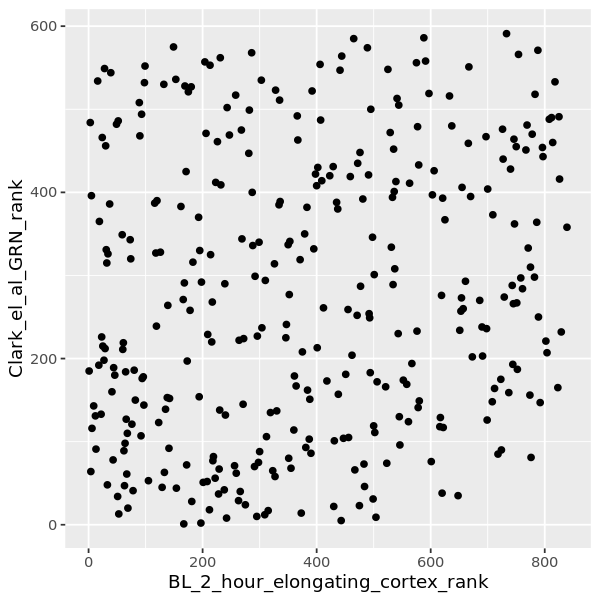

In [10]:
# Basic scatter plot
ggplot(joined_ranks, aes(x=BL_2_hour_elongating_cortex_rank, y=Clark_el_al_GRN_rank)) + geom_point()

In [11]:
# top 100 TFs for each network

(top_100 <- filter(joined_ranks, BL_2_hour_elongating_cortex_rank<=100 | Clark_el_al_GRN_rank <=100))

gene,name,Clark_el_al_GRN_rank,Clark_el_al_GRN_out_degree,BL_2_hour_elongating_cortex_rank,BL_2_hour_elongating_cortex_out_degree
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
AT1G51700,DOF1.7,1,203,167,34
AT1G77080,MAF1,2,170,197,30
AT4G01680,MYB55,5,124,443,10
AT3G15500,NAC055,8,118,242,23
AT1G59750,ARF1,9,109,504,7
AT1G18330,RVE7,10,108,295,18
AT1G28370,ERF11,12,100,309,18
AT4G17490,ERF6,13,96,53,92
AT4G00730,ANL2,14,92,373,13


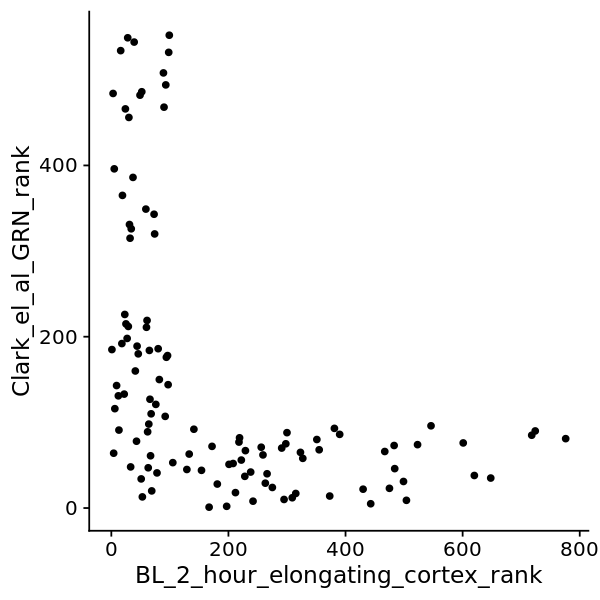

In [12]:
ggplot(top_100, aes(x=BL_2_hour_elongating_cortex_rank, y=Clark_el_al_GRN_rank)) + geom_point() + theme_cowplot()

In [13]:
## add labels for HAT7 and GTL1 family 

# to highlight 
HAT7_degree <- filter(top_100, name %in% c("HAT7", "HB-23", "HB-13", "HB-20"))
GTL1_degree <- filter(top_100, name %in% c("GTL1"))

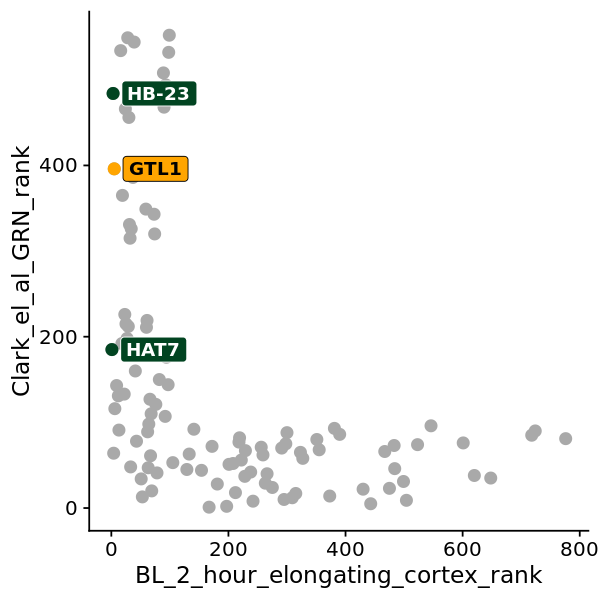

In [14]:
(deg_plot <- 
  ggplot(top_100, 
         aes(x=BL_2_hour_elongating_cortex_rank, y=Clark_el_al_GRN_rank)) + 
  geom_point(color="darkgrey", size=3) + 
  geom_point(data=HAT7_degree,
             aes(x=BL_2_hour_elongating_cortex_rank, y=Clark_el_al_GRN_rank),size=3, color="#014421") + 
   geom_point(data=GTL1_degree,
             aes(x=BL_2_hour_elongating_cortex_rank, y=Clark_el_al_GRN_rank),size=3, color="#FFA500") + 
  theme_cowplot()  + 
 # xlab("TF Out Degree") + 
 # ylab("Top 10 TFs") + 
# scale_x_continuous(limits=c(100, 375)) + 

 geom_label(data = HAT7_degree, nudge_x = 15, angle = 0,hjust="left",
            fill= "#014421", colour = "white", fontface = "bold",
                           aes(x=BL_2_hour_elongating_cortex_rank, y=Clark_el_al_GRN_rank, label = name)) + 
  geom_label(data = GTL1_degree, nudge_x = 15, angle = 0,hjust="left",
            fill= "#FFA500", colour = "black", fontface = "bold",
                           aes(x=BL_2_hour_elongating_cortex_rank, y=Clark_el_al_GRN_rank, label = name)))

In [15]:
colnames(top_100)

[1] "gene"                                  
[2] "name"                                  
[3] "Clark_el_al_GRN_rank"                  
[4] "Clark_el_al_GRN_out_degree"            
[5] "BL_2_hour_elongating_cortex_rank"      
[6] "BL_2_hour_elongating_cortex_out_degree"

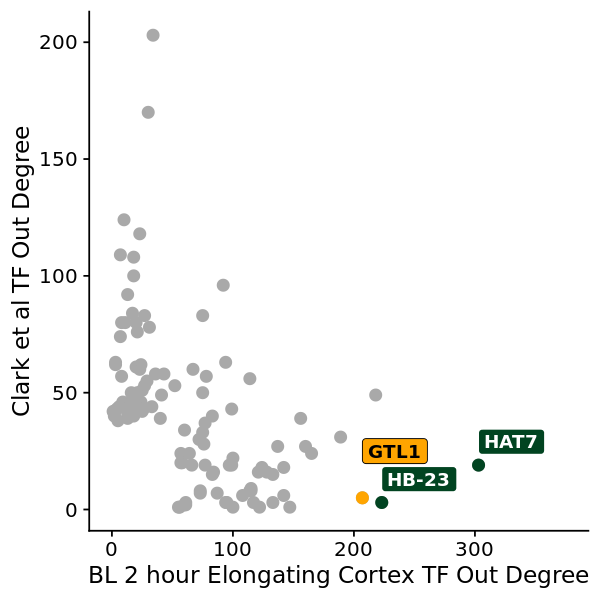

In [16]:
options(repr.plot.width=5, repr.plot.height=5)

(deg_plot2 <- 
  ggplot(top_100, 
         aes(x=BL_2_hour_elongating_cortex_out_degree, y=Clark_el_al_GRN_out_degree)) + 
  geom_point(color="darkgrey", size=3) + 
  geom_point(data=HAT7_degree,
             aes(x=BL_2_hour_elongating_cortex_out_degree, y=Clark_el_al_GRN_out_degree),size=3, color="#014421") + 
   geom_point(data=GTL1_degree,
             aes(x=BL_2_hour_elongating_cortex_out_degree, y=Clark_el_al_GRN_out_degree),size=3, color="#FFA500") + 
  theme_cowplot()  + 
 xlab("BL 2 hour Elongating Cortex TF Out Degree") + 
 ylab("Clark et al TF Out Degree") + 
scale_x_continuous(limits=c(0, 375)) + 

 geom_label(data = HAT7_degree, nudge_y = 10, angle = 0,hjust="left",
            fill= "#014421", colour = "white", fontface = "bold",
                           aes(x=BL_2_hour_elongating_cortex_out_degree, y=Clark_el_al_GRN_out_degree, label = name)) + 
  geom_label(data = GTL1_degree, nudge_y = 20, angle = 0,hjust="left",
            fill= "#FFA500", colour = "black", fontface = "bold",
                           aes(x=BL_2_hour_elongating_cortex_out_degree, y=Clark_el_al_GRN_out_degree, label = name)))

ggsave("./output/Cortex_2_hour_vs_Clark_GRN_outdegree.pdf", width = 5, height = 5)

In [17]:
# output top 10 

(top_10 <- filter(top_100, BL_2_hour_elongating_cortex_rank<=10))

gene,name,Clark_el_al_GRN_rank,Clark_el_al_GRN_out_degree,BL_2_hour_elongating_cortex_rank,BL_2_hour_elongating_cortex_out_degree
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
AT5G65310,ATHB-5,64,49,4,218
AT1G13260,RAV1,116,31,6,189
AT4G31800,WRKY18,143,24,9,165
AT5G15150,HAT7,185,19,1,303
AT1G33240,GTL1,396,5,5,207
AT1G26960,HB-23,484,3,3,223


In [18]:
(left_joined_ranks <- left_join(BL2hr_elong_cortex_sel, Clark_sel))

Joining, by = c("gene", "name")



gene,name,BL_2_hour_elongating_cortex_rank,BL_2_hour_elongating_cortex_out_degree,Clark_el_al_GRN_rank,Clark_el_al_GRN_out_degree
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
AT5G15150,HAT7,1,303,185,19
AT3G24120,AT3G24120,2,225,NA,NA
AT1G26960,HB-23,3,223,484,3
AT5G65310,ATHB-5,4,218,64,49
AT1G33240,GTL1,5,207,396,5
AT1G13260,RAV1,6,189,116,31
AT1G69780,HB-13,7,183,NA,NA
AT3G01220,HB-20,8,181,NA,NA
AT4G31800,WRKY18,9,165,143,24


In [19]:
# output top 10 

(top_10 <- filter(left_joined_ranks, BL_2_hour_elongating_cortex_rank<=10))

gene,name,BL_2_hour_elongating_cortex_rank,BL_2_hour_elongating_cortex_out_degree,Clark_el_al_GRN_rank,Clark_el_al_GRN_out_degree
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
AT5G15150,HAT7,1,303,185,19
AT3G24120,AT3G24120,2,225,NA,NA
AT1G26960,HB-23,3,223,484,3
AT5G65310,ATHB-5,4,218,64,49
AT1G33240,GTL1,5,207,396,5
AT1G13260,RAV1,6,189,116,31
AT1G69780,HB-13,7,183,NA,NA
AT3G01220,HB-20,8,181,NA,NA
AT4G31800,WRKY18,9,165,143,24


In [20]:
write_csv(top_10, "./output/Cortex_vs_Clark_GRN_top_10.csv")

## Check number of shared edges

In [26]:
(Elong_cortex_GRN <- read_csv("./data/cortex_SCT_celloracle_network_iGRN.csv") %>%
filter(cluster=="Elongation_Cortex_BRZ_2_BL") %>%
mutate(TF_target=paste0(source, "_", target)))

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  source = col_character(),
  source_name = col_character(),
  target = col_character(),
  target_name = col_character(),
  cluster = col_character(),
  coef_mean = col_double(),
  coef_abs = col_double(),
  p = col_double(),
  `-logp` = col_double()
)




X1,source,source_name,target,target_name,cluster,coef_mean,coef_abs,p,-logp,TF_target
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1601923,AT1G13260,RAV1,AT5G35530,RPS3C,Elongation_Cortex_BRZ_2_BL,0.11238661,0.11238661,5.841200e-16,15.233498,AT1G13260_AT5G35530
1190690,AT5G67300,MYB44,AT4G14320,AT4G14320,Elongation_Cortex_BRZ_2_BL,0.08950642,0.08950642,2.021152e-11,10.694401,AT5G67300_AT4G14320
1710140,AT1G19000,AT1G19000,AT5G54750,AT5G54750,Elongation_Cortex_BRZ_2_BL,0.08520003,0.08520003,1.221286e-14,13.913183,AT1G19000_AT5G54750
1472980,AT4G31800,WRKY18,AT5G07860,AT5G07860,Elongation_Cortex_BRZ_2_BL,0.08483496,0.08483496,6.572906e-18,17.182243,AT4G31800_AT5G07860
755077,AT1G01720,NAC002,AT2G47320,CYP21-3,Elongation_Cortex_BRZ_2_BL,-0.08481826,0.08481826,1.671389e-20,19.776922,AT1G01720_AT2G47320
51755,AT5G08330,TCP21,AT1G07590,AT1G07590,Elongation_Cortex_BRZ_2_BL,-0.08421172,0.08421172,2.933002e-12,11.532688,AT5G08330_AT1G07590
1190674,AT1G80840,WRKY40,AT4G14320,AT4G14320,Elongation_Cortex_BRZ_2_BL,0.08300912,0.08300912,1.153311e-12,11.938054,AT1G80840_AT4G14320
755068,AT1G08010,GATA11,AT2G47320,CYP21-3,Elongation_Cortex_BRZ_2_BL,0.08075497,0.08075497,1.171311e-13,12.931328,AT1G08010_AT2G47320
318207,AT2G18160,BZIP2,AT1G63220,AT1G63220,Elongation_Cortex_BRZ_2_BL,0.07721072,0.07721072,7.586101e-21,20.119981,AT2G18160_AT1G63220


In [30]:
(Clark_GRN <- read_csv("./data/Clark_et_al_2021_Nat_Comms_GRNs//Clark_Nat_comm_GRN_abundance_only.csv") %>%
mutate(TF_target=paste0(regulator, "_", target)))


── Column specification ────────────────────────────────────────────────────────
cols(
  regulator = col_character(),
  `regulator site` = col_logical(),
  interaction = col_character(),
  target = col_character(),
  `target site` = col_logical(),
  Time = col_character(),
  Type = col_character(),
  Pearson = col_logical(),
  Spearman = col_logical(),
  Weight = col_double()
)




regulator,regulator site,interaction,target,target site,Time,Type,Pearson,Spearman,Weight,TF_target
<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<chr>
AT1G06070,NA,regulates,AT2G17150,NA,15min,TF-Abundance,NA,NA,0.9463927,AT1G06070_AT2G17150
AT1G06070,NA,regulates,AT3G48920,NA,15min,TF-Abundance,NA,NA,0.7969030,AT1G06070_AT3G48920
AT1G06070,NA,regulates,AT4G17230,NA,15min,TF-Abundance,NA,NA,0.9861189,AT1G06070_AT4G17230
AT1G06070,NA,regulates,AT5G03740,NA,15min,TF-Abundance,NA,NA,0.9316234,AT1G06070_AT5G03740
AT1G68840,NA,regulates,AT1G01090,NA,15min,TF-Abundance,NA,NA,0.9365353,AT1G68840_AT1G01090
AT1G68840,NA,regulates,AT1G28350,NA,15min,TF-Abundance,NA,NA,0.6980488,AT1G68840_AT1G28350
AT1G68840,NA,regulates,AT1G48920,NA,15min,TF-Abundance,NA,NA,0.8927953,AT1G68840_AT1G48920
AT1G68840,NA,regulates,AT1G64230,NA,15min,TF-Abundance,NA,NA,0.9667626,AT1G68840_AT1G64230
AT1G68840,NA,regulates,AT2G35790,NA,15min,TF-Abundance,NA,NA,0.6875303,AT1G68840_AT2G35790


In [31]:
Elong_cortex_GRN$in_Clark_GRN <- Elong_cortex_GRN$TF_target %in% Clark_GRN$TF_target

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [33]:
table(Elong_cortex_GRN$in_Clark_GRN)


FALSE  TRUE 
19957    43 

In [34]:
Clark_GRN$in_Elong_cortex_GRN <- Clark_GRN$TF_target %in% Elong_cortex_GRN$TF_target

table(Clark_GRN$in_Elong_cortex_GRN)


FALSE  TRUE 
11358    44 

In [35]:
filter(Clark_GRN, in_Elong_cortex_GRN==T)

regulator,regulator site,interaction,target,target site,Time,Type,Pearson,Spearman,Weight,TF_target,in_Elong_cortex_GRN
<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<chr>,<lgl>
AT5G08330,NA,regulates,AT4G24275,NA,2hr,TF-Abundance,NA,NA,0.6975088,AT5G08330_AT4G24275,TRUE
AT3G50060,NA,regulates,AT1G20823,NA,15min,TF-Abundance,NA,NA,0.6485904,AT3G50060_AT1G20823,TRUE
AT4G17490,NA,regulates,AT1G68840,NA,15min,TF-Abundance,NA,NA,0.3561718,AT4G17490_AT1G68840,TRUE
AT4G31800,NA,regulates,AT5G44020,NA,15min,TF-Abundance,NA,NA,0.6688863,AT4G31800_AT5G44020,TRUE
AT1G08320,NA,regulates,AT5G49360,NA,30min,TF-Abundance,NA,NA,1.0000000,AT1G08320_AT5G49360,TRUE
AT1G13260,NA,regulates,AT1G09970,NA,30min,TF-Abundance,NA,NA,0.7921187,AT1G13260_AT1G09970,TRUE
AT1G28370,NA,regulates,AT1G19020,NA,30min,TF-Abundance,NA,NA,0.9639205,AT1G28370_AT1G19020,TRUE
AT1G64620,NA,regulates,AT1G75680,NA,30min,TF-Abundance,NA,NA,0.7270535,AT1G64620_AT1G75680,TRUE
AT5G63790,NA,regulates,AT1G76600,NA,30min,TF-Abundance,NA,NA,0.7593718,AT5G63790_AT1G76600,TRUE


In [36]:
filter(Elong_cortex_GRN, in_Clark_GRN==T)

X1,source,source_name,target,target_name,cluster,coef_mean,coef_abs,p,-logp,TF_target,in_Clark_GRN
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1529713,AT1G43160,RAP2-6,AT5G15970,KIN2,Elongation_Cortex_BRZ_2_BL,0.025743226,0.025743226,1.094905e-09,8.960623,AT1G43160_AT5G15970,TRUE
116291,AT3G02150,TCP13,AT1G16370,OCT6,Elongation_Cortex_BRZ_2_BL,-0.023867669,0.023867669,4.702970e-15,14.327628,AT3G02150_AT1G16370,TRUE
217683,AT2G47070,SPL1,AT1G30690,PATL4,Elongation_Cortex_BRZ_2_BL,0.022019709,0.022019709,2.771308e-12,11.557315,AT2G47070_AT1G30690,TRUE
66567,AT1G13260,RAV1,AT1G09970,LRR XI-23,Elongation_Cortex_BRZ_2_BL,-0.021663185,0.021663185,3.170344e-12,11.498894,AT1G13260_AT1G09970,TRUE
1539018,AT1G53910,RAP2-12,AT5G17380,HACL,Elongation_Cortex_BRZ_2_BL,0.020591103,0.020591103,3.203055e-13,12.494436,AT1G53910_AT5G17380,TRUE
231729,AT2G23320,WRKY15,AT1G33590,AT1G33590,Elongation_Cortex_BRZ_2_BL,0.020163879,0.020163879,5.528302e-11,10.257408,AT2G23320_AT1G33590,TRUE
1183985,AT5G15150,HAT7,AT4G12880,ENODL19,Elongation_Cortex_BRZ_2_BL,0.019747153,0.019747153,2.956985e-13,12.529151,AT5G15150_AT4G12880,TRUE
465588,AT3G15210,ERF4,AT1G80840,WRKY40,Elongation_Cortex_BRZ_2_BL,0.019141095,0.019141095,2.209105e-16,15.655784,AT3G15210_AT1G80840,TRUE
949552,AT1G25560,TEM1,AT3G23690,BHLH77,Elongation_Cortex_BRZ_2_BL,0.016546210,0.016546210,6.810389e-10,9.166828,AT1G25560_AT3G23690,TRUE


In [38]:
# Jaccard Index = (the number in both sets) / (the number in either set) * 100

(both_sets <- nrow(filter(Elong_cortex_GRN, in_Clark_GRN==T)))



[1] 43

In [39]:
(either_set <- length(unique(c(Elong_cortex_GRN$TF_target, Clark_GRN$TF_target))))

[1] 31330

In [41]:
(Jaccard <- (both_sets/either_set) * 100)

[1] 0.1372486